<a href="https://colab.research.google.com/github/JesmirData/Portfolio/blob/main/c24025_Grupo133_TP_P2_Anal%C3%ADtica_auditor%C3%ADa_CMM_Paraguay_Jun_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP2

## IMPORTACION DE LIBRERIAS

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##FUNCIONES

In [ ]:
#*explorar los datos de los df y los muestra
def explorar_df(df) -> None:
    print('Muestra de datos')
    df.head()
    print('\nFormato del dataframe')
    df.shape
    print('\nBúsqueda de valores nulos por columna')
    df.isnull().sum()
    print('\nFormato de los datos por columna')
    df.dtypes

#*Chekeo de valores null en el df
def check_null_values(df):
    if df.isnull().sum().values.sum() >0:

        df = limpiar_nan(df)#quita los NaN
    else:
      pass
    return df

#*buscar columnas identicas (duplicadas)

def search_duplicates(df):

    columns = df.columns
# Inicializar una lista para almacenar las columnas que son exactamente iguales
    duplicates = []
    # Comparar todas las columnas entre sí
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            if df[columns[i]].equals(df[columns[j]]):
                duplicates.append((columns[i], columns[j]))

    print("Pares de columnas que son exactamente iguales:", len(duplicates))
    return duplicates

#buscar filas identicas (duplicadas)
def search_duplicates_row(df):

    if df.duplicated().sum() != 0 :
        print( f'Pares de filas que son exactamente iguales: {df.duplicated().sum()}' )

        df = df.drop_duplicates(subset=df.columns, keep='first', inplace=True)
    else:
        print( f'Pares de filas que son exactamente iguales: 0' )
        return
    return df

#*transforma los valores de la col distributors para que se presenten como int
def transformar_valor(valor):
    if valor < 2000 and valor > 999:
        return valor
    return valor/10


def transformar_valor2(valor):
    if valor < 2 and valor > 1 :
        return valor*1000
    return valor


#*rellena los NaN con 0
def limpiar_nan(df):
    return df.fillna(0)


#*castea una columna a int
def cast_int(df):
    return df.astype(str).str.replace('.', '',).astype(int).apply(transformar_valor).astype(int)


#*limpiar simbolos y reemplazar otros
def limpiar_simbolos(df):
    return df.replace('$', '',).replace('.', '',).replace(',', '.',)

#*elimina columnas innecesarias o vacias
def del_columnas(df,lista_col):
    for col in lista_col:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)
        else:
           pass
    return df

#*Crea un configuracion inicial de como se deben mostrar los datos del df
def setup_df():

    pd.set_option('display.max_rows', None)
    pd.set_option('display.float_format', '{:.2f}'.format)


* Configuracion de df

In [ ]:
# Configuracion de como mostrar los datos del DataFrame
#setup_df() #aplicar config

##IMPORTACION Y OBTENCIÓN DE DATOS

In [ ]:
#!----------------------------------------------------------------------------------------
#!IMPORTACION DE DATOS
#!----------------------------------------------------------------------------------------

#*Lista con los nombres de las hojas de la base de datos
HOJAS = ['sales_in_paraguay','distributors_profiles','exports_to_paraguay','locations_profiles', ]

#*id de la planilla que contiene todas las hojas
id_sheet = '1_llWFVuc66VgauNo1EzNEpAg55nXHgkp4CNTxpbDETk'

#*Lista que guarda todas las urls correspondientes a la base de datos para poder ser accedidas
URLs = [f'https://docs.google.com/spreadsheets/d/{id_sheet}/gviz/tq?tqx=out:csv&sheet={hoja}' for hoja in HOJAS]

#*creacion de los dataframes
dataframes = [pd.read_csv(url) for url in URLs]

#*desempaquetado de los df
df_sales_in_paraguay, df_distributors_profiles, df_exports_to_paraguay, df_locations_profiles  = dataframes



##INSPECCION PRELIMINAR

###1.Ventas








* Primeros 5 elementos del *df*

In [ ]:
#primero 5 elementos del df
df_sales_in_paraguay.head()


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583.0,"$54.510.203,61","$45.268.636,86","$51.579.748,25","$21.780.180,58","$26.576.776,52","$0,00","$55.872.547,77","$18.050.385,12","$178.927.599,01","$2.788,80","$54.510.203,61","$20.982,80"
1,1104.0,"$32.438.788,20","$25.837.100,49","$36.603.264,50","$21.883.374,92","$1.473.437,08","$0,00","$46.239.695,30","$33.102.840,61","$35.563.624,11","$599,01","$9.945.371,16","$187.306,41"
2,1384.0,"$21.780.180,58","$78.927.599,01","$25.837.100,49","$33.102.840,61","$51.579.748,25","$0,00","$21.883.374,92","$78.927.599,01","$1.346.769,34","$0,00","$36.603.264,50","$300.838,58"
3,379.0,"$79.358.855,35","$90.185.311,22","$45.268.636,86","$54.510.203,61","$59.358.855,35","$0,00","$79.358.855,35","$32.067.534,68","$53.172.624,14","$2.922,94","$33.102.840,61","$579.748,25"
4,1599.0,"$11.758.005,07","$21.780.180,58","$57.187.306,41","$9.945.371,16","$32.067.534,68","$0,00","$53.172.624,14","$57.187.306,41","$1.155.872.547,77","$203,61","$43.512.922,94","$730.734,07"


* Tamaño del df

In [ ]:
#tamaño del df
df_sales_in_paraguay.shape

(45, 13)

* Valores nulos en el df

In [ ]:
#valores Nulos en el df
df_sales_in_paraguay.isnull().sum()

,0
distributor,1
Rubber,0
Brass,0
Vinyl,0
Granite,0
Stone,0
Brick,0
Aluminum,0
Glass,0
Plexiglass,0


* tipos de datos en el df

In [ ]:
#tipos de datos en el df
df_sales_in_paraguay.dtypes

,0
distributor,float64
Rubber,object
Brass,object
Vinyl,object
Granite,object
Stone,object
Brick,object
Aluminum,object
Glass,object
Plexiglass,object


###2.Exportaciones

* Primeros 5 elementos del df

In [ ]:
#primero 5 elementos del df
df_exports_to_paraguay.head()


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
0,1.526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00",NaN,Filas,Valores
1,1.553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00",NaN,NaN,NaN
2,1.666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00",NaN,NaN,NaN
3,364.000,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00",NaN,NaN,NaN
4,920.000,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00",NaN,NaN,NaN


* Tamaño del df

In [ ]:
#tamaño del df
df_exports_to_paraguay.shape

(46, 16)

*Valores nulos en el df

In [ ]:
#valores Nulos en el df
df_exports_to_paraguay.isnull().sum()

,0
distributor,0
Rubber,0
Brass,0
Vinyl,0
Granite,0
Stone,0
Brick,0
Aluminum,0
Glass,0
Plexiglass,0


* Tipos de datos en el df

In [ ]:
#tipos de datos en el df
df_exports_to_paraguay.dtypes

,0
distributor,float64
Rubber,object
Brass,object
Vinyl,object
Granite,object
Stone,object
Brick,object
Aluminum,object
Glass,object
Plexiglass,object


###3.Distribuidores

* Primeros 5 elementos del df

In [ ]:
#primero 5 elementos del df
df_distributors_profiles.head()


,id,distributor,distributor activities,years in the construction market
0,565.000,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1,1.384,Balistreri LLC,"construction materials import/distribution, si...",22
2,1.183,Brekke-Stiedemann,construction materials import/distribution,13
3,1.526,Collins LLC,construction materials import/distribution,12
4,29.000,Cummings-Ward,"construction materials import/distribution, ir...",23


* Tamaño del df

In [ ]:
#tamaño del df
df_distributors_profiles.shape

(46, 4)

* Valores nulos en el df

In [ ]:
#valores Nulos en el df
df_distributors_profiles.isnull().sum()

,0
id,2
distributor,2
distributor activities,2
years in the construction market,0


* Tipos de datos en el df

In [ ]:
#tipos de datos en el df
df_distributors_profiles.dtypes

,0
id,float64
distributor,object
distributor activities,object
years in the construction market,int64


##LIMPIEZA Y ACONDICIONAMIENTO DE DATOS

###1.Limpieza ventas

In [ ]:
#!----------------------------------------------------------------------------------------
#! Limpieza df_sales_in_paraguay



df_sales_in_paraguay = check_null_values(df_sales_in_paraguay)#chekear valores NaN
df_sales_in_paraguay = df_sales_in_paraguay.drop(df_sales_in_paraguay.index[-1]) #elimina la ultia fila del df

a = search_duplicates(df_sales_in_paraguay)
if len(a) != 0:
    df_sales_in_paraguay = del_columnas(df=df_sales_in_paraguay,lista_col=a) #eliminar columnas innecesarias

search_duplicates_row(df_sales_in_paraguay) # buscar filas duplicadas y eliminarlas

for columna in df_sales_in_paraguay.columns:
    if columna == 'distributor':
        df_sales_in_paraguay[columna] = df_sales_in_paraguay[columna].apply(transformar_valor2).astype(int)
    else:
        df_sales_in_paraguay[columna] = df_sales_in_paraguay[columna].apply(limpiar_simbolos)
        df_sales_in_paraguay[columna]= df_sales_in_paraguay[columna].astype(float)



Pares de columnas que son exactamente iguales: 0
Pares de filas que son exactamente iguales: 0


* Primeros 5 elementos del df

In [ ]:
#inspeccion de los datos obtenidos luego de la limpieza
df_sales_in_paraguay.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.0,55872547.77,18050385.12,1.789276e+08,2788.80,54510203.61,20982.80
1,1104,32438788.20,25837100.49,36603264.50,21883374.92,1473437.08,0.0,46239695.30,33102840.61,3.556362e+07,599.01,9945371.16,187306.41
2,1384,21780180.58,78927599.01,25837100.49,33102840.61,51579748.25,0.0,21883374.92,78927599.01,1.346769e+06,0.00,36603264.50,300838.58
3,379,79358855.35,90185311.22,45268636.86,54510203.61,59358855.35,0.0,79358855.35,32067534.68,5.317262e+07,2922.94,33102840.61,579748.25
4,1599,11758005.07,21780180.58,57187306.41,9945371.16,32067534.68,0.0,53172624.14,57187306.41,1.155873e+09,203.61,43512922.94,730734.07


* Tamaño del df

In [ ]:
#tamaño del df
df_sales_in_paraguay.shape

(44, 13)

* Valores nulos en el df

In [ ]:
#valores Nulos en el df
df_sales_in_paraguay.isnull().sum()

,0
distributor,0
Rubber,0
Brass,0
Vinyl,0
Granite,0
Stone,0
Brick,0
Aluminum,0
Glass,0
Plexiglass,0


* Tipos de datos en el df

In [ ]:
#tipos de datos en el df
df_sales_in_paraguay.dtypes

,0
distributor,int64
Rubber,float64
Brass,float64
Vinyl,float64
Granite,float64
Stone,float64
Brick,float64
Aluminum,float64
Glass,float64
Plexiglass,float64


###2.Limpieza exportaciones

In [ ]:
#!----------------------------------------------------------------------------------------
##!Limpieza df_exports_to_paraguay


a = search_duplicates(df_sales_in_paraguay)


if len(a) != 0:
    a = a + ['Columnas','Unnamed: 13','Unnamed: 14']
    df_sales_in_paraguay = del_columnas(df=df_sales_in_paraguay,lista_col=a)
else:
    df_exports_to_paraguay = del_columnas(df_exports_to_paraguay, ['Columnas','Unnamed: 13','Unnamed: 14']) #eliminar columnas innecesarias

df_exports_to_paraguay = check_null_values(df_exports_to_paraguay) #chekear valores NaN
search_duplicates_row(df_exports_to_paraguay) # buscar filas duplicadas y eliminarlas
for columna in df_exports_to_paraguay.columns:
    if columna == 'distributor':
        df_exports_to_paraguay[columna] = df_exports_to_paraguay[columna].apply(transformar_valor2).astype(int) #transformar a int 'distributor'

    else:
            df_exports_to_paraguay[columna] = df_exports_to_paraguay[columna].apply(limpiar_simbolos) #limpieza de simbolos inecesarios
            df_exports_to_paraguay[columna] = df_exports_to_paraguay[columna].astype(float) #transforma a float todos los datos





Pares de columnas que son exactamente iguales: 0
Pares de filas que son exactamente iguales: 2


* Primeros 5 elementos en el df

In [ ]:
#inspeccion de los datos obtenidos luego de la limpieza
df_exports_to_paraguay.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.0,36031577.0,31118167.0,21322223.0,35382848.0,35280292.0,32362235.0,36836190.0,9.440859e+09,34676425.0,31862742.0,32588556.0
1,1553,27566922.0,21996538.0,39412316.0,25681987.0,41861783.0,22408742.0,40690302.0,37958885.0,8.726745e+09,26472020.0,27403955.0,37881851.0
2,1666,37577095.0,41457655.0,31467967.0,37577926.0,35845106.0,42953168.0,33817289.0,41602183.0,1.223232e+09,30599951.0,40514747.0,38569219.0
3,364,36012730.0,41667692.0,22837073.0,29288200.0,39553494.0,33513588.0,36827718.0,29669764.0,4.485875e+07,26820925.0,20797348.0,21064408.0
4,920,43416417.0,36290780.0,23679738.0,21183706.0,25210622.0,30864041.0,41173207.0,36719169.0,4.389311e+07,22575455.0,21351499.0,24607204.0


* Tamaño del df

In [ ]:
#tamaño del df
df_exports_to_paraguay.shape

(44, 13)

* Valores nulos en el df

In [ ]:
#valores Nulos en el df
df_exports_to_paraguay.isnull().sum()

,0
distributor,0
Rubber,0
Brass,0
Vinyl,0
Granite,0
Stone,0
Brick,0
Aluminum,0
Glass,0
Plexiglass,0


* Tipos de datos en el df

In [ ]:
#tipos de datos en el df
df_exports_to_paraguay.dtypes

,0
distributor,int64
Rubber,float64
Brass,float64
Vinyl,float64
Granite,float64
Stone,float64
Brick,float64
Aluminum,float64
Glass,float64
Plexiglass,float64


###3.Limpieza distribuidores

In [ ]:
#!----------------------------------------------------------------------------------------
#!Limpieza df_distributors_profiles



a = search_duplicates(df_distributors_profiles)
if len(a) != 0:
    df_distributors_profiles = del_columnas(df=df_distributors_profiles, lista_col=a) #eliminar columnas innecesarias
df_distributors_profiles = check_null_values(df_distributors_profiles) #chekear valores NaN

search_duplicates_row(df_distributors_profiles) # buscar filas duplicadas y eliminarlas

df_distributors_profiles['id'] = df_distributors_profiles['id'].apply(transformar_valor2).astype(int)#transformar a int 'id'
df_distributors_profiles.loc[36, 'id'] = 1017
for columna in df_distributors_profiles.columns:
    df_distributors_profiles = df_distributors_profiles.drop(df_distributors_profiles.index[df_distributors_profiles[columna] == 0])



Pares de columnas que son exactamente iguales: 0
Pares de filas que son exactamente iguales: 1


* Primeros 5 elementos en el df

In [ ]:
#inspeccion de los datos obtenidos luego de la limpieza
df_exports_to_paraguay.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.0,36031577.0,31118167.0,21322223.0,35382848.0,35280292.0,32362235.0,36836190.0,9.440859e+09,34676425.0,31862742.0,32588556.0
1,1553,27566922.0,21996538.0,39412316.0,25681987.0,41861783.0,22408742.0,40690302.0,37958885.0,8.726745e+09,26472020.0,27403955.0,37881851.0
2,1666,37577095.0,41457655.0,31467967.0,37577926.0,35845106.0,42953168.0,33817289.0,41602183.0,1.223232e+09,30599951.0,40514747.0,38569219.0
3,364,36012730.0,41667692.0,22837073.0,29288200.0,39553494.0,33513588.0,36827718.0,29669764.0,4.485875e+07,26820925.0,20797348.0,21064408.0
4,920,43416417.0,36290780.0,23679738.0,21183706.0,25210622.0,30864041.0,41173207.0,36719169.0,4.389311e+07,22575455.0,21351499.0,24607204.0


* Tamaño del df

In [ ]:
#tamaño del df
df_distributors_profiles.shape

(44, 4)

* Valores nulos en el df

In [ ]:
#valores Nulos en el df
df_distributors_profiles.isnull().sum()

,0
id,0
distributor,0
distributor activities,0
years in the construction market,0


* Tipos de datos en el df

In [ ]:
#tipos de datos en el df
df_distributors_profiles.dtypes

,0
id,int64
distributor,object
distributor activities,object
years in the construction market,int64




---


##ANALISIS


---

######*Bajas ventas de acero y ladrillos*

*  Realizamos una comparacion entre Exportación y Ventas.



In [ ]:
#ordeno el df por distribuidor y los ordeno de forma asc
df_sales_in_paraguay = df_sales_in_paraguay.sort_values(by='distributor', ascending=True)

#sumo todos los valores despues de 'distributor' y los ordeno de forma asc
total_sales = df_sales_in_paraguay.iloc[:,1:].sum().sort_values(ascending=False)

#creo un nuevo df para el total de ventas correspondiente a cada rubro
total_sales = pd.DataFrame(total_sales/1000000, columns=['Ventas Totales (Millones de $)'])

display(total_sales)

,Ventas Totales (Millones de $)
Plexiglass,25974.040669
Glass,2173.275883
Aluminum,2163.832571
Plastic,2047.338174
Wood,1930.565060
Vinyl,1912.589121
Granite,1845.294550
Brass,1840.659381
Rubber,1680.453941
Stone,1651.519396


In [ ]:
#ordeno el df por distribuidor y los ordeno de forma asc
df_exports_to_paraguay = df_exports_to_paraguay.sort_values(by='distributor', ascending=True)

#sumo todos los valores despues de 'distributor' y los ordeno de forma desc
total_exports = df_exports_to_paraguay.iloc[:,1:].sum().sort_values(ascending=False)

#creo un nuevo df para el total de ventas correspondiente a cada rubro
total_exports = pd.DataFrame(total_exports/1000000, columns=['Exportaciones Totales (Millones de $)'])

display(total_exports)

,Exportaciones Totales (Millones de $)
Plexiglass,20779.232535
Steel,13652.930026
Brick,5260.549009
Aluminum,1513.169630
Stone,1474.570889
Rubber,1465.042482
Plastic,1456.143794
Glass,1429.786765
Wood,1409.171577
Vinyl,1396.050453


In [ ]:
#combinacion de los df

total_combinados = pd.merge(total_exports.reset_index(), total_sales.reset_index(), on='index')

total_combinados.set_index('index', inplace=True)

display(total_combinados)

,Exportaciones Totales (Millones de $),Ventas Totales (Millones de $)
index,,
Plexiglass,20779.232535,25974.040669
Steel,13652.930026,0.058458
Brick,5260.549009,0.152658
Aluminum,1513.169630,2163.832571
Stone,1474.570889,1651.519396
Rubber,1465.042482,1680.453941
Plastic,1456.143794,2047.338174
Glass,1429.786765,2173.275883
Wood,1409.171577,1930.565060


In [ ]:
# add ratio/ventas ventas sobre las exportaciones(proporcion)

total_combinados['ratio Ventas/Exportaciones'] = total_combinados['Ventas Totales (Millones de $)'] / total_combinados['Exportaciones Totales (Millones de $)']
display(total_combinados)

,Exportaciones Totales (Millones de $),Ventas Totales (Millones de $),ratio Ventas/Exportaciones
index,,,
Plexiglass,20779.232535,25974.040669,1.250000
Steel,13652.930026,0.058458,0.000004
Brick,5260.549009,0.152658,0.000029
Aluminum,1513.169630,2163.832571,1.430000
Stone,1474.570889,1651.519396,1.120000
Rubber,1465.042482,1680.453941,1.147034
Plastic,1456.143794,2047.338174,1.406000
Glass,1429.786765,2173.275883,1.520000
Wood,1409.171577,1930.565060,1.370000




---


##ANALISIS VISUAL


---

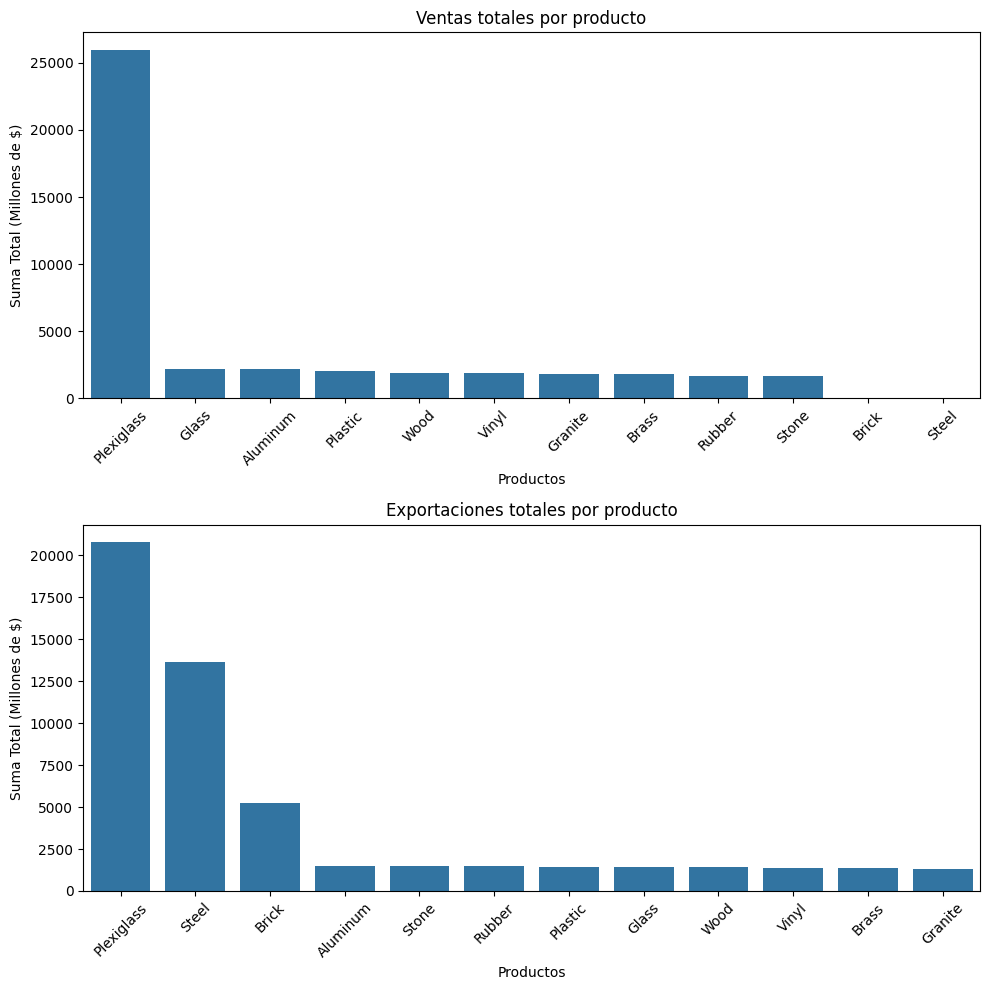

In [ ]:
# Grafico de barras
fig,ax = plt.subplots(nrows=2, ncols=1 ,figsize=(10, 10))


#Grafico de barras para ventas
sns.barplot(x=total_sales.index, y= total_sales['Ventas Totales (Millones de $)'], ax=ax[0])
ax[0].set_title('Ventas totales por producto') # titulo del grafico
ax[0].set_xlabel('Productos') # nombre del eje x
ax[0].set_ylabel('Suma Total (Millones de $)') # nombre del eje Y
ax[0].tick_params(axis='x', rotation=45) # ver la etiquetas en eje x

#Grafico de barras para exportaciones
sns.barplot(x=total_exports.index, y= total_exports['Exportaciones Totales (Millones de $)'], ax=ax[1])
ax[1].set_title('Exportaciones totales por producto') # titulo del grafico
ax[1].set_xlabel('Productos') # nombre del eje x
ax[1].set_ylabel('Suma Total (Millones de $)') # nombre del eje Y
ax[1].tick_params(axis='x', rotation=45) # ver la etiquetas en eje x

plt.tight_layout()
plt.show()

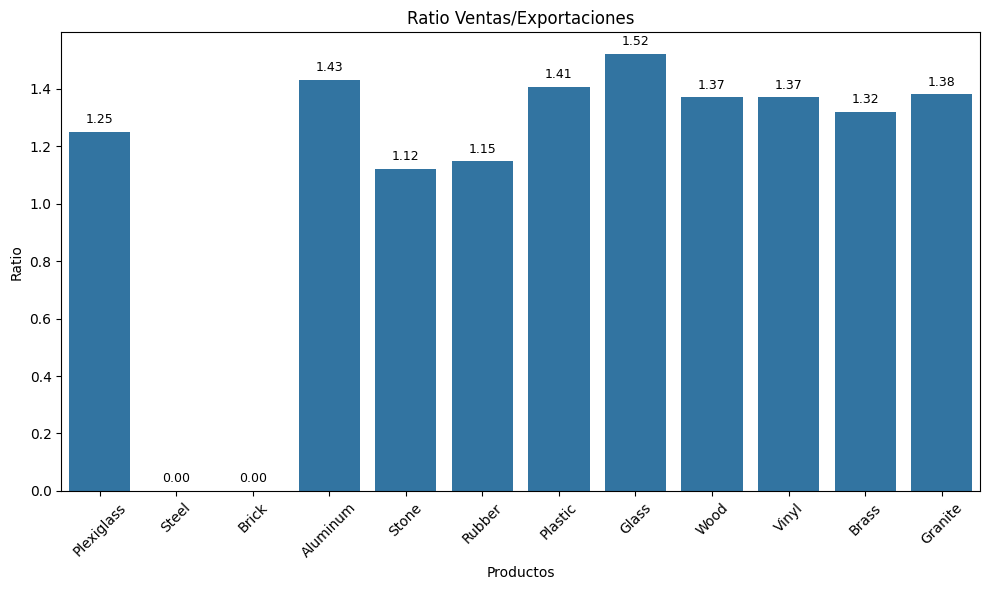

In [ ]:

#GRAFICO PRORCION DE VENTAS/EXPORTACION

plt.figure(figsize=(10,6))
sns.barplot(x=total_combinados.index, y= 'ratio Ventas/Exportaciones', data=total_combinados)
plt.title('Ratio Ventas/Exportaciones')
plt.xlabel('Productos')
plt.ylabel('Ratio')
plt.xticks(rotation=45)

for index, value in enumerate(total_combinados['ratio Ventas/Exportaciones']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize= 9)

plt.tight_layout()
plt.show()


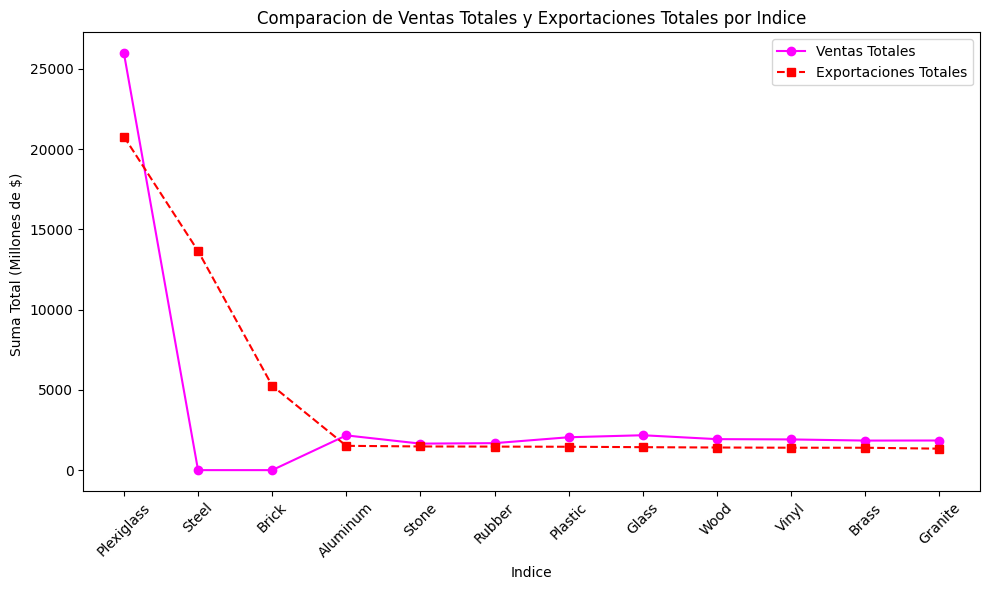

In [ ]:
#GRAFICO DE BARRAS COMPARACION VENTAS TOTALES Y EXPORTACIONES TOTALES

plt.figure(figsize=(10,6))
plt.plot(total_combinados.index, total_combinados['Ventas Totales (Millones de $)'], marker='o' , linestyle = '-', color='magenta', label = 'Ventas Totales')
plt.plot(total_combinados.index, total_combinados['Exportaciones Totales (Millones de $)'], marker='s',linestyle = '--', color = 'red', label = 'Exportaciones Totales')

plt.title('Comparacion de Ventas Totales y Exportaciones Totales por Indice')
plt.xlabel('Indice')
plt.ylabel('Suma Total (Millones de $) ')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

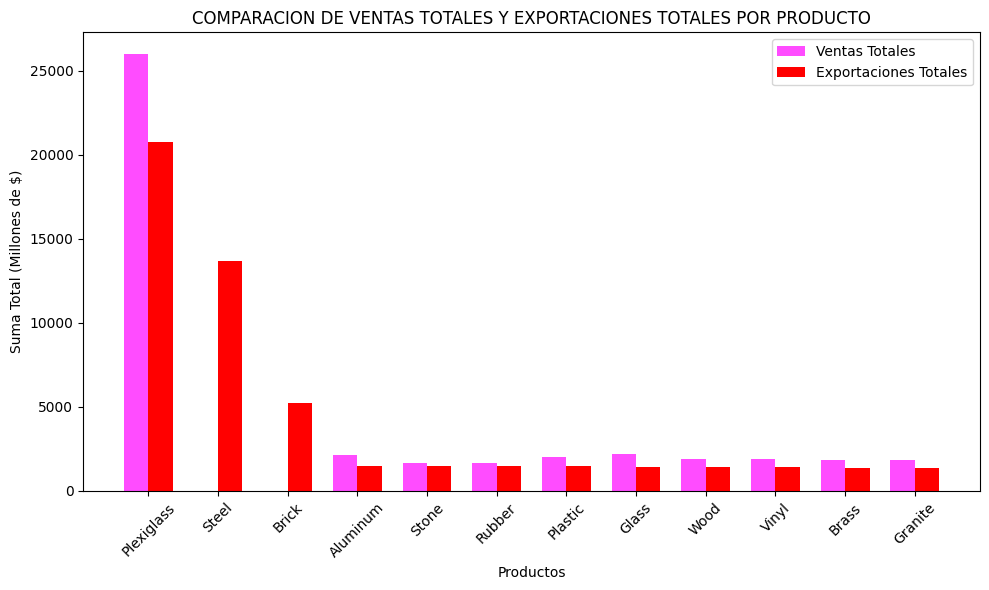

In [ ]:
#Grafico de barras acumu

plt.figure(figsize=(10,6))

bar_width = 0.35
indices = range(len(total_combinados))

plt.bar(indices, total_combinados['Ventas Totales (Millones de $)'], width=bar_width, label='Ventas Totales', color='magenta', alpha=0.7)
plt.bar([i + bar_width for i in indices], total_combinados['Exportaciones Totales (Millones de $)'], width=bar_width, label='Exportaciones Totales', color='red')

plt.xlabel('Productos')
plt.ylabel('Suma Total (Millones de $)')
plt.title('COMPARACION DE VENTAS TOTALES Y EXPORTACIONES TOTALES POR PRODUCTO')
plt.xticks([i + bar_width / 2 for i in indices], total_combinados.index,rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



#CONCLUSIONES





##LUEGO DE REALIZADA LA AUDITORIA A CMM - PARAGUAY - JUNIO 2024 PODEMOS CONCLUIR LO SIGUIENTE:

###1- AL MOMENTO DE REALIZAR LA LIMPIEZA DE DATOS SE EVIDENCIO EN EL LISTADO DE EXPORTACIONES UNA DUPLICIDAD PARA TODOS LOS MATERIALES DESPACHADOS A LOS SIGUIENTES DISTRIBUIDORES:
* 1169 Williamson, Bailey and McLaughlin 325  Marks Inc
* LO CUAL MODIFICABA LOS MONTOS TOTALES DE LOS MATERIALES EXPORTADOS
---
###2- SE EVIDENCIA UNA ANOMALIA CONSIDERABLE CON LOS MATERIALES EXPORTADOS "STEEL" Y "BRICK" PARA EL PERIODO ESTUDIADO.
---
###3- DEL 100% DEL MONTO DE LOS MATERIALES EXPORTADOS UN TERCIO QUE REPRESENTAN "STEEL" 25,97% Y "BRICK" 10% MUESTRAN UNA TASA CASI NULA DE RETORNO DE LA INVERSION.
---
###4- lOS DISTRIBUIDORES DE LA ZONA DE PARAGUAY CUENTAN EN PROMEDIO DE 16 ANOS EN EL MERCADO POR LO CUAL SE HACE NECESARIO UN ESTUDIO MAS DETALLADO PARA COMPRENDER LAS POSIBLES CAUSAS QUE GENERARON TAN POCAS VENTAS DE ESTOS DOS RUBROS EN EL PERIODO ESPECIFICADO.
---
###5- SE SUGIERE VERIFICAR LAS ORDENES DE PEDIDO EMITIDAS POR ESTOS DISTRIBUIDORES DONDE SE OBSERVA QUE SUS VENTAS FUERON NULAS EN ALGUNOS CASOS Y CASI NULAS EN OTROS - CASI 80% DEL TOTAL DE LOS DISTRIBUIDORES NO TUVIERON VENTAS DE ESTOS DOS RUBROS.
---
###6- SE SUGIERE REALIZAR AUDITORIA EN CAMPO PARA COTEJAR LOS NUMEROS RECIBIDOS PARA AUDITAR CON LA CANTIDAD DE MATERIAL DISPONIBLE EN STOCK DE CADA DISTRIBUIDOR PARA ELIMINAR CUALQUIER DISCREPANCIA.
---
###7- LLEVAR ACABO UNA REUNION VIRTUAL CON LOS DISTRIBUIDORES PARA BUSCAR LAS POSIBLES CAUSAS DE ESTAS VENTAS TAN BAJAS Y PROPONER LAS SOLUCIONES MAS ADECUADAS PARA SOLVENTAR ESTA SITUACION.
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')